# Análisis predictivo

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
Mean Squared Error: 0.5558915986952444
R^2 Score: 0.5757877060324508
        Actual  Predicted
20046  0.47700   0.719123
3024   0.45800   1.764017
15663  5.00001   2.709659
20484  2.18600   2.838926
9814   2.78000   2.604657


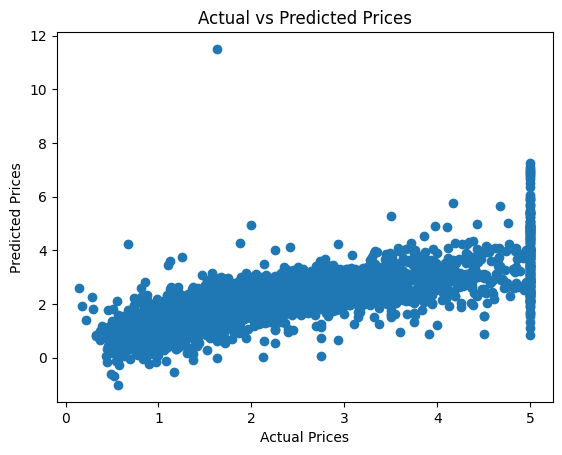

In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el conjunto de datos de viviendas de California
housing = fetch_california_housing()
data = pd.DataFrame(housing.data, columns=housing.feature_names)
data['MedHouseVal'] = housing.target

# Visualización de las primeras filas del conjunto de datos
print(data.head())

# Separar las características (X) y la variable objetivo (y)
X = data.drop('MedHouseVal', axis=1)
y = data['MedHouseVal']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Comparar algunas predicciones con los valores reales
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())

# Visualización de los resultados
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()


# Toma de decisiones basadas en Datos

## Contexto

**Ejemplo de Toma de Decisiones Basada en Datos en un Entorno Militar**

Imagina que estamos desarrollando un sistema de apoyo a la toma de decisiones para un comando militar que necesita optimizar la planificación de misiones en tiempo real. El objetivo es utilizar datos históricos y en tiempo real para tomar decisiones informadas que maximicen el éxito de las misiones y minimicen los riesgos.

**Pasos del Proceso**

1. **Recolección de Datos:**

  * **Fuentes de Datos:** datos históricos de misiones, inteligencia de campo, información meteorológica, movimientos de tropas enemigas, y datos de sensores (drones, satélites).
  * **Tipos de Datos:** Datos estructurados (tablas, bases de datos) y no estructurados (imágenes, videos, informes de inteligencia).

2. **Preparación de Datos:**

  * **Limpieza de Datos:** Eliminación de datos duplicados, corrección de errores, y tratamiento de valores faltantes.
  * **Integración de Datos:** Combinación de datos de múltiples fuentes para crear una visión unificada.

3. **Análisis Exploratorio de Datos (EDA):**

  * **Visualización:** Gráficos y diagramas para entender patrones y tendencias.
  * **Estadísticas Descriptivas:** Medias, medianas, desviaciones estándar, etc.

4. **Modelado Predictivo:**

  * **Elección del Modelo:** Modelos de regresión, árboles de decisión, redes neuronales, etc.
  * **Entrenamiento del Modelo:** Uso de datos históricos para entrenar el modelo.
  * **Validación del Modelo:** Evaluación del modelo utilizando datos de prueba y métricas de rendimiento (precisión, recall, F1 score).

5. **Implementación del Modelo:**

  * **Sistema en Tiempo Real:** Integración del modelo en un sistema que puede recibir datos en tiempo real y generar predicciones.
  * **Alertas y Recomendaciones:** El sistema genera alertas y recomendaciones basadas en las predicciones del modelo.


In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Datos ficticios de misiones (por simplicidad)
data = {
    'mission_id': range(1, 101),
    'troop_count': np.random.randint(50, 200, 100),
    'enemy_count': np.random.randint(20, 150, 100),
    'weather_condition': np.random.choice(['Clear', 'Rain', 'Fog'], 100),
    'terrain_difficulty': np.random.choice(['Low', 'Medium', 'High'], 100),
    'mission_success': np.random.choice([0, 1], 100)  # 0 = failure, 1 = success
}

# Crear DataFrame
df = pd.DataFrame(data)

# Convertir variables categóricas a variables dummy
df = pd.get_dummies(df, columns=['weather_condition', 'terrain_difficulty'], drop_first=True)

# Separar características y variable objetivo
X = df.drop(['mission_id', 'mission_success'], axis=1)
y = df['mission_success']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de clasificación
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

# Generar una recomendación basada en una nueva misión
new_mission = pd.DataFrame({
    'troop_count': [120],
    'enemy_count': [80],
    'weather_condition_Clear': [1],
    'weather_condition_Fog': [0],
    'weather_condition_Rain': [0],  # Añadir esta línea
    'terrain_difficulty_Medium': [1],
    'terrain_difficulty_High': [0],
    'terrain_difficulty_Low': [0]  # Añadir esta línea
})

# Asegurar que las columnas están en el mismo orden que el conjunto de entrenamiento
new_mission = new_mission[X_train.columns]

prediction = model.predict(new_mission)
recommendation = 'Success' if prediction[0] == 1 else 'Failure'
print(f'Predicted Outcome for New Mission: {recommendation}')


Accuracy: 0.3
              precision    recall  f1-score   support

           0       0.22      0.22      0.22         9
           1       0.36      0.36      0.36        11

    accuracy                           0.30        20
   macro avg       0.29      0.29      0.29        20
weighted avg       0.30      0.30      0.30        20

Predicted Outcome for New Mission: Failure


**Pruebas Adicionales**

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Datos ficticios de misiones (por simplicidad)
data = {
    'mission_id': range(1, 101),
    'troop_count': np.random.randint(50, 200, 100),
    'enemy_count': np.random.randint(20, 150, 100),
    'weather_condition': np.random.choice(['Clear', 'Rain', 'Fog'], 100),
    'terrain_difficulty': np.random.choice(['Low', 'Medium', 'High'], 100),
    'mission_success': np.random.choice([0, 1], 100)  # 0 = failure, 1 = success
}

# Crear DataFrame
df = pd.DataFrame(data)

# Convertir variables categóricas a variables dummy
df = pd.get_dummies(df, columns=['weather_condition', 'terrain_difficulty'], drop_first=True)

# Separar características y variable objetivo
X = df.drop(['mission_id', 'mission_success'], axis=1)
y = df['mission_success']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de clasificación
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

# Pruebas adicionales

# 1. Prueba con una nueva misión donde todas las características son promedio
new_mission_1 = pd.DataFrame({
    'troop_count': [125],
    'enemy_count': [75],
    'weather_condition_Clear': [0],
    'weather_condition_Fog': [0],
    'weather_condition_Rain': [1],
    'terrain_difficulty_Medium': [1],
    'terrain_difficulty_High': [0],
    'terrain_difficulty_Low': [0]
})
new_mission_1 = new_mission_1[X_train.columns]
prediction_1 = model.predict(new_mission_1)
print(f'Predicted Outcome for New Mission 1: {"Success" if prediction_1[0] == 1 else "Failure"}')

# 2. Prueba con una nueva misión en condiciones óptimas
new_mission_2 = pd.DataFrame({
    'troop_count': [200],
    'enemy_count': [20],
    'weather_condition_Clear': [1],
    'weather_condition_Fog': [0],
    'weather_condition_Rain': [0],
    'terrain_difficulty_Medium': [0],
    'terrain_difficulty_High': [0],
    'terrain_difficulty_Low': [1]
})
new_mission_2 = new_mission_2[X_train.columns]
prediction_2 = model.predict(new_mission_2)
print(f'Predicted Outcome for New Mission 2: {"Success" if prediction_2[0] == 1 else "Failure"}')

# 3. Prueba con una nueva misión en condiciones difíciles
new_mission_3 = pd.DataFrame({
    'troop_count': [50],
    'enemy_count': [150],
    'weather_condition_Clear': [0],
    'weather_condition_Fog': [1],
    'weather_condition_Rain': [0],
    'terrain_difficulty_Medium': [0],
    'terrain_difficulty_High': [1],
    'terrain_difficulty_Low': [0]
})
new_mission_3 = new_mission_3[X_train.columns]
prediction_3 = model.predict(new_mission_3)
print(f'Predicted Outcome for New Mission 3: {"Success" if prediction_3[0] == 1 else "Failure"}')

# 4. Prueba con una misión estándar
new_mission_4 = pd.DataFrame({
    'troop_count': [150],
    'enemy_count': [100],
    'weather_condition_Clear': [0],
    'weather_condition_Fog': [0],
    'weather_condition_Rain': [1],
    'terrain_difficulty_Medium': [0],
    'terrain_difficulty_High': [1],
    'terrain_difficulty_Low': [0]
})
new_mission_4 = new_mission_4[X_train.columns]
prediction_4 = model.predict(new_mission_4)
print(f'Predicted Outcome for New Mission 4: {"Success" if prediction_4[0] == 1 else "Failure"}')


Accuracy: 0.7
              precision    recall  f1-score   support

           0       0.73      0.85      0.79        13
           1       0.60      0.43      0.50         7

    accuracy                           0.70        20
   macro avg       0.67      0.64      0.64        20
weighted avg       0.69      0.70      0.69        20

Predicted Outcome for New Mission 1: Failure
Predicted Outcome for New Mission 2: Failure
Predicted Outcome for New Mission 3: Success
Predicted Outcome for New Mission 4: Failure
